In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import time
import string


In [2]:
sfpd = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present.csv')

In [3]:
sfpd

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2023/02/01 02:50:00 PM,2023/02/01,14:50,2023,Wednesday,2023/02/02 12:13:00 AM,124045703474,1240457,230078055,230323120.0,...,-122.420812,POINT (-122.42081213698863 37.753703092703674),53.0,NaN,NaN,NaN,3.0,NaN,5.0,3.0
1,2023/02/01 08:00:00 AM,2023/02/01,08:00,2023,Wednesday,2023/03/24 09:35:00 AM,125760705143,1257607,230206115,230830810.0,...,-122.497319,POINT (-122.4973187290067 37.77571541347681),8.0,NaN,NaN,NaN,NaN,NaN,4.0,8.0
2,2023/02/01 03:37:00 PM,2023/02/01,15:37,2023,Wednesday,2023/02/06 08:24:00 PM,125808106374,1258081,236054392,NaN,...,-122.427707,POINT (-122.42770734768459 37.73721373583178),59.0,NaN,NaN,NaN,NaN,NaN,5.0,9.0
3,2023/02/01 04:45:00 PM,2023/02/01,16:45,2023,Wednesday,2023/02/01 05:45:00 PM,125463609015,1254636,239000437,NaN,...,-122.408079,POINT (-122.40807910223747 37.794940685499824),104.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0
4,2023/02/01 04:45:00 PM,2023/02/01,16:45,2023,Wednesday,2023/02/01 05:45:00 PM,125463609164,1254636,239000437,NaN,...,-122.408079,POINT (-122.40807910223747 37.794940685499824),104.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26206,2023/04/18 10:10:00 AM,2023/04/18,10:10,2023,Tuesday,2023/04/18 11:45:00 AM,126678162030,1266781,230268585,231081053.0,...,-122.408036,POINT (-122.40803623744476 37.78640961281089),19.0,NaN,1.0,NaN,NaN,NaN,3.0,6.0
26207,2023/04/18 06:03:00 AM,2023/04/18,06:03,2023,Tuesday,2023/04/18 06:04:00 AM,126667907043,1266679,230235556,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26208,2023/04/18 12:00:00 AM,2023/04/18,00:00,2023,Tuesday,2023/04/18 01:03:00 PM,126678628150,1266786,230268961,231081556.0,...,-122.406628,POINT (-122.4066282007833 37.779314673752964),32.0,NaN,NaN,1.0,1.0,NaN,10.0,1.0
26209,2023/04/18 12:00:00 PM,2023/04/18,12:00,2023,Tuesday,2023/04/18 12:00:00 PM,126673272000,1266732,230268541,231081289.0,...,-122.426077,POINT (-122.42607650292528 37.76142713261589),37.0,NaN,NaN,NaN,5.0,NaN,5.0,3.0


# Frequency of incident reports overall over time

In [4]:
incidentReport_count = sfpd.groupby('Incident Date').count()[['Incident Datetime']].reset_index()
incidentReport_count

,Incident Date,Incident Datetime
0,2023/02/01,403
1,2023/02/02,366
2,2023/02/03,394
3,2023/02/04,362
4,2023/02/05,345
...,...,...
72,2023/04/14,297
73,2023/04/15,265
74,2023/04/16,224
75,2023/04/17,202


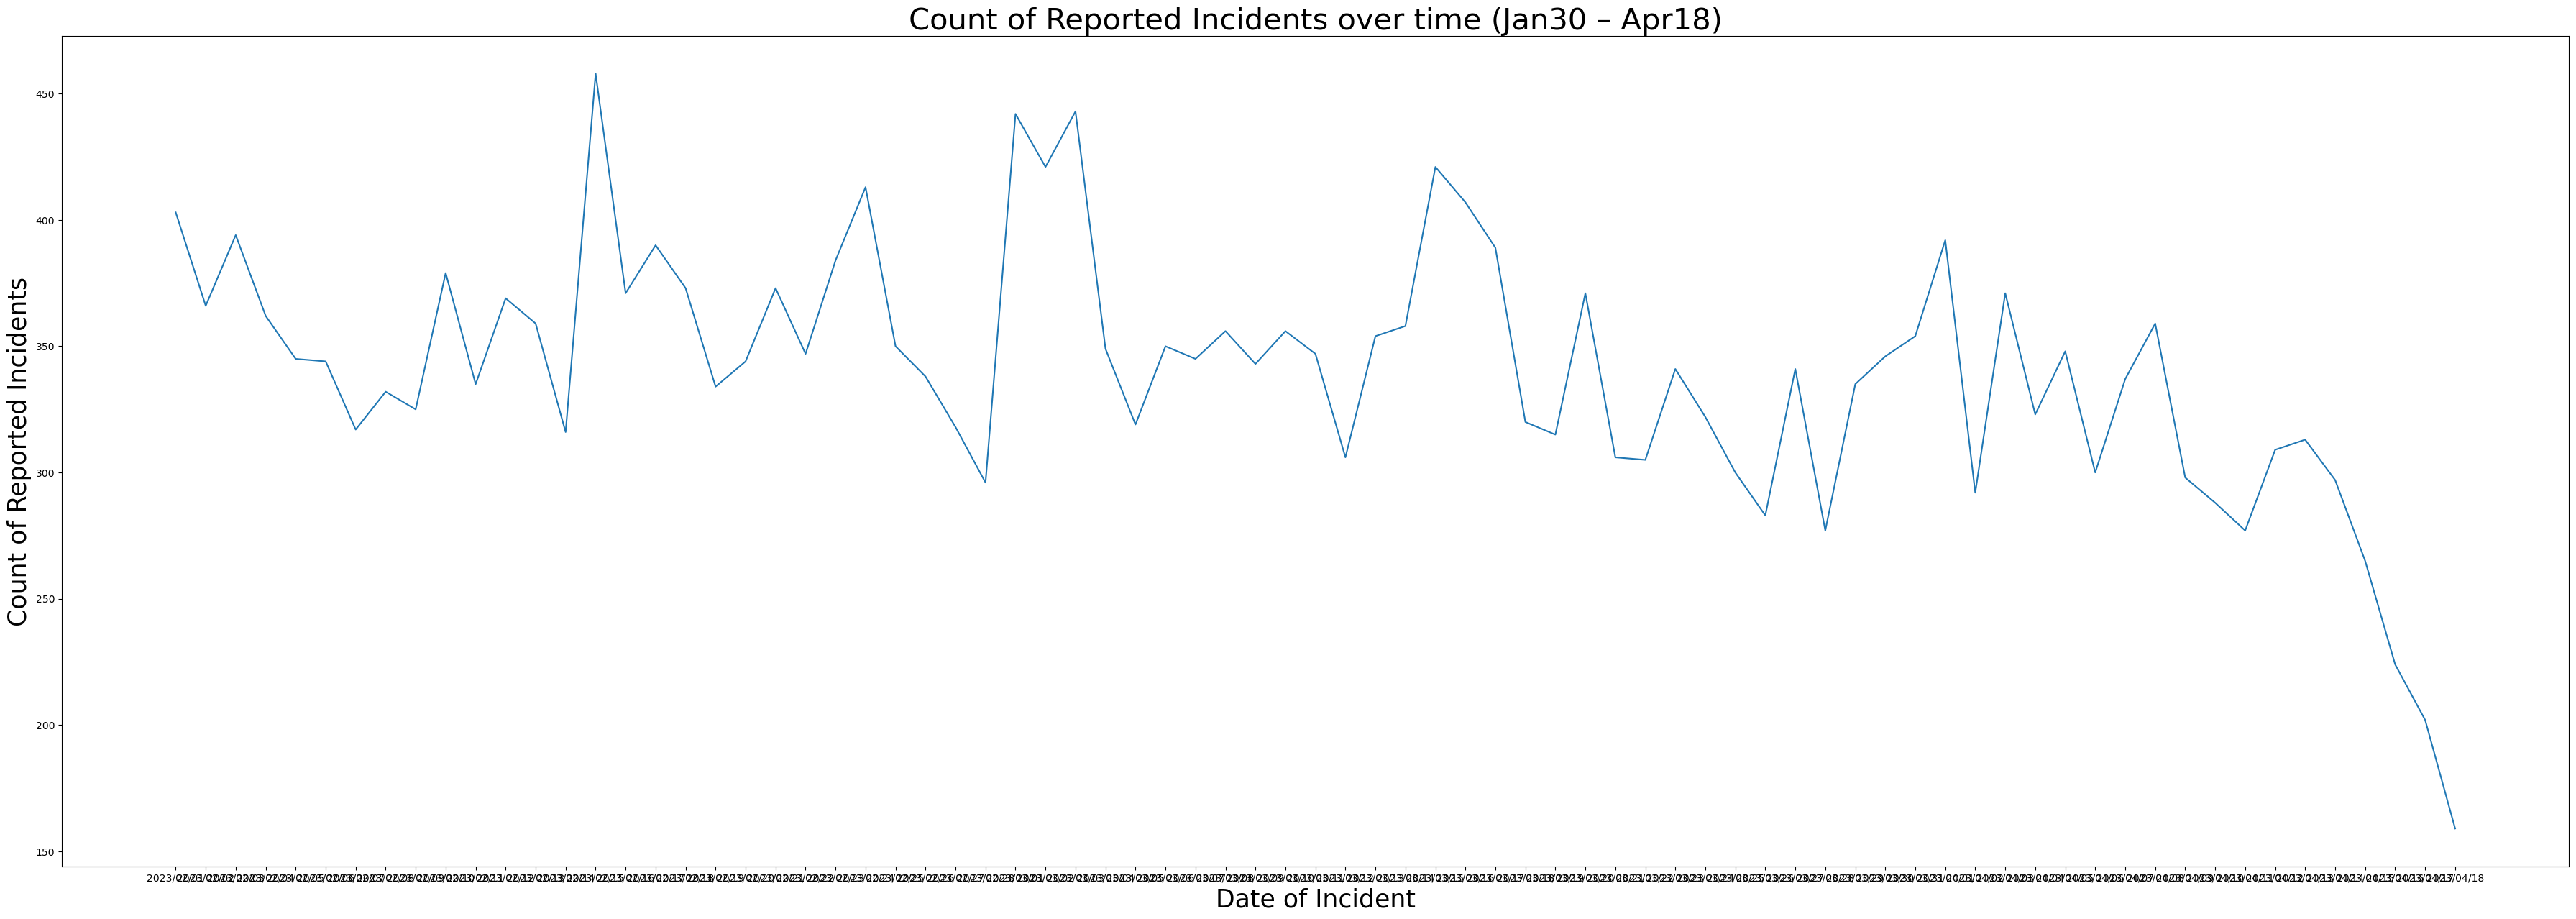

In [5]:
fig, ax = plt.subplots()
plot = sns.lineplot(data=incidentReport_count, x="Incident Date", y="Incident Datetime")
fig.set_size_inches(45, 15)
plt.xlabel('Date of Incident', fontsize = 25); # binned by day
plt.ylabel('Count of Reported Incidents', fontsize = 25);
plt.title('Count of Reported Incidents over time (Jan30 – Apr18)', fontsize = 30);

# Frequency of SFPD Incident Reports for Incident Types over time 

In [6]:
ordered_df = sfpd.sort_values(by = 'Incident Date')
ordered_df['Incident Date'] = pd.to_datetime(ordered_df['Incident Date'])
# create month column
ordered_df['Incident Month'] = ordered_df['Incident Date'].apply(lambda x: x.month)
# create month + year column
ordered_df['Month_Yr'] = ordered_df['Incident Date'].dt.strftime('%b-%Y')
ordered_df['Month_Yr'] = pd.to_datetime(ordered_df['Month_Yr'])
# converting ^ to datetime adds a date of the first of every month

In [7]:
def incident_count_day(incident_col):
    df = ordered_df.loc[ordered_df['Incident Category'] == incident_col]
    df = df.groupby(by = 'Incident Date').count()
    return df[['Incident Datetime']]#.to_list()

In [8]:
d2 = ordered_df.groupby(by = ['Incident Category', 'Incident Date']).count().reset_index()#'Incident Category')[['Incident Category', 'Point']].pivot(columns = 'Incident Category')


In [9]:
d2

,Incident Category,Incident Date,Incident Datetime,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,...,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts,Incident Month,Month_Yr
0,Arson,2023-02-02,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,1,1,1,1
1,Arson,2023-02-03,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,1,1,1,1
2,Arson,2023-02-05,3,3,3,3,3,3,3,3,...,3,0,0,0,0,0,3,3,3,3
3,Arson,2023-02-06,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,1,1,1,1
4,Arson,2023-02-07,2,2,2,2,2,2,2,2,...,2,0,0,0,0,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Weapons Offense,2023-04-14,3,3,3,3,3,3,3,3,...,3,0,0,1,2,0,3,3,3,3
2229,Weapons Offense,2023-04-15,3,3,3,3,3,3,3,3,...,3,0,0,0,2,0,3,3,3,3
2230,Weapons Offense,2023-04-16,4,4,4,4,4,4,4,4,...,4,0,0,0,0,0,4,4,4,4
2231,Weapons Offense,2023-04-17,2,2,2,2,2,2,2,2,...,2,0,0,0,2,0,2,2,2,2


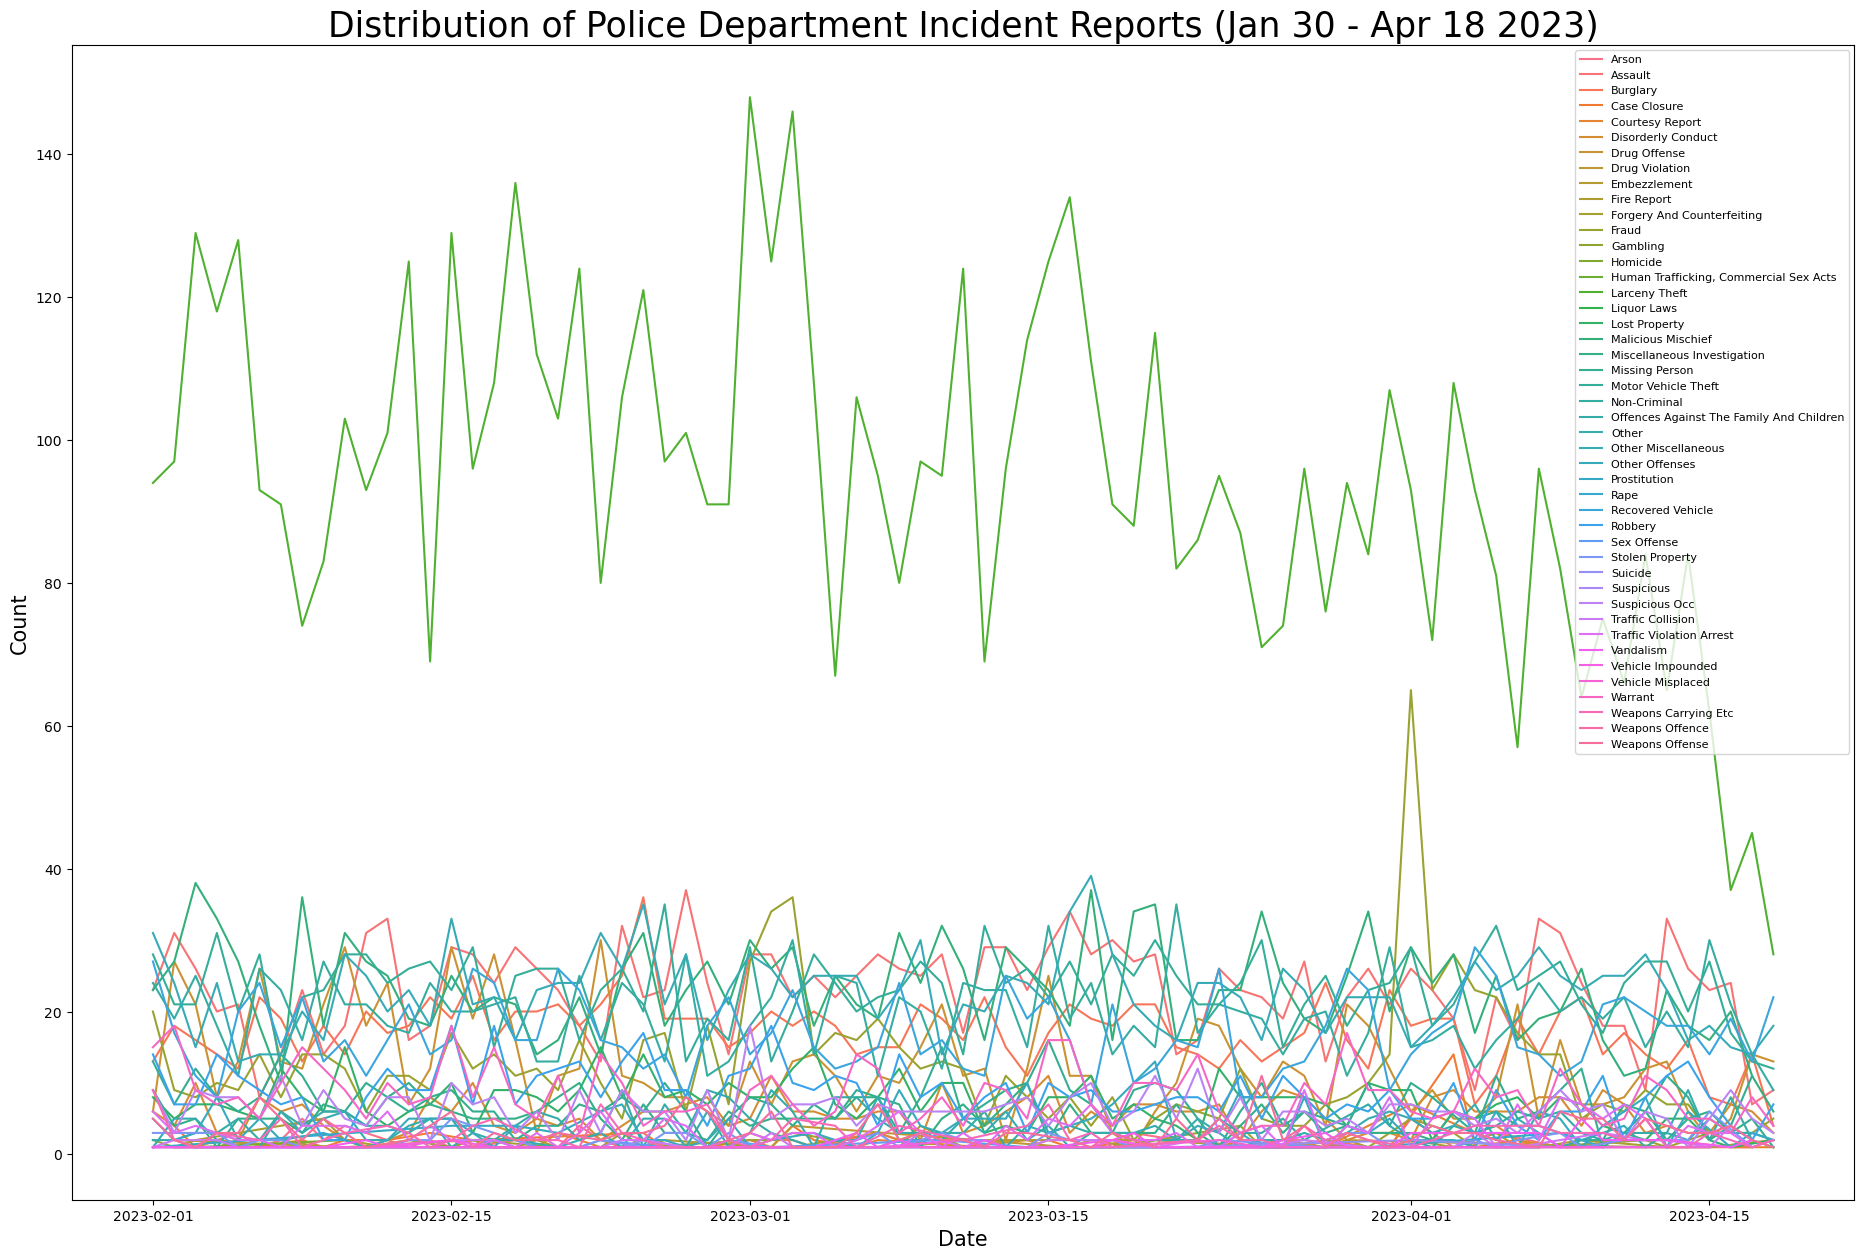

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plot = sns.lineplot(data=d2, x="Incident Date", y="Incident Datetime", hue="Incident Category")
fig.set_size_inches(23, 15)
plot.legend(fontsize = 8)
plt.xlabel('Date', fontsize = 15); # binned by day
plt.ylabel('Count', fontsize = 15);
plt.title('Distribution of Police Department Incident Reports (Jan 30 - Apr 18 2023)', fontsize = 25);
#plot.show()

In [11]:
sfpd_crime_type = pd.read_csv('SFPD_crime_classification.csv')
sfpd_crime_type = sfpd_crime_type.rename(columns = {'incident category': 'Incident Category'})

In [12]:
# table with count for each type of crime
ordered_df.groupby('Incident Category').count().iloc[:, 1].to_frame().sort_values(by = 'Incident Date', ascending = False)#.index()


,Incident Date
Incident Category,
Larceny Theft,7271
Motor Vehicle Theft,1784
Assault,1768
Malicious Mischief,1753
Other Miscellaneous,1739
Non-Criminal,1504
Burglary,1319
Recovered Vehicle,1303
Drug Offense,955


In [13]:
sfpd_crime_df = pd.merge(d2, sfpd_crime_type, on = 'Incident Category')

In [14]:
sfpd_crime_df = sfpd_crime_df.loc[sfpd_crime_df['crime type'] != '-']
# filters 5 crime types we care about

In [15]:
sfpd_crime_df['crime type'].value_counts()

property crime    723
minor offense     492
person crime      455
drug crime         88
Name: crime type, dtype: int64

In [16]:
sfpd_crime_df

,Incident Category,Incident Date,Incident Datetime,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,...,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts,Incident Month,Month_Yr,crime type
0,Arson,2023-02-02,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,1,1,1,person crime
1,Arson,2023-02-03,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,1,1,1,person crime
2,Arson,2023-02-05,3,3,3,3,3,3,3,3,...,0,0,0,0,0,3,3,3,3,person crime
3,Arson,2023-02-06,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,1,1,1,person crime
4,Arson,2023-02-07,2,2,2,2,2,2,2,2,...,0,0,0,0,0,2,2,2,2,person crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Weapons Offense,2023-04-14,3,3,3,3,3,3,3,3,...,0,0,1,2,0,3,3,3,3,person crime
2229,Weapons Offense,2023-04-15,3,3,3,3,3,3,3,3,...,0,0,0,2,0,3,3,3,3,person crime
2230,Weapons Offense,2023-04-16,4,4,4,4,4,4,4,4,...,0,0,0,0,0,4,4,4,4,person crime
2231,Weapons Offense,2023-04-17,2,2,2,2,2,2,2,2,...,0,0,0,2,0,2,2,2,2,person crime


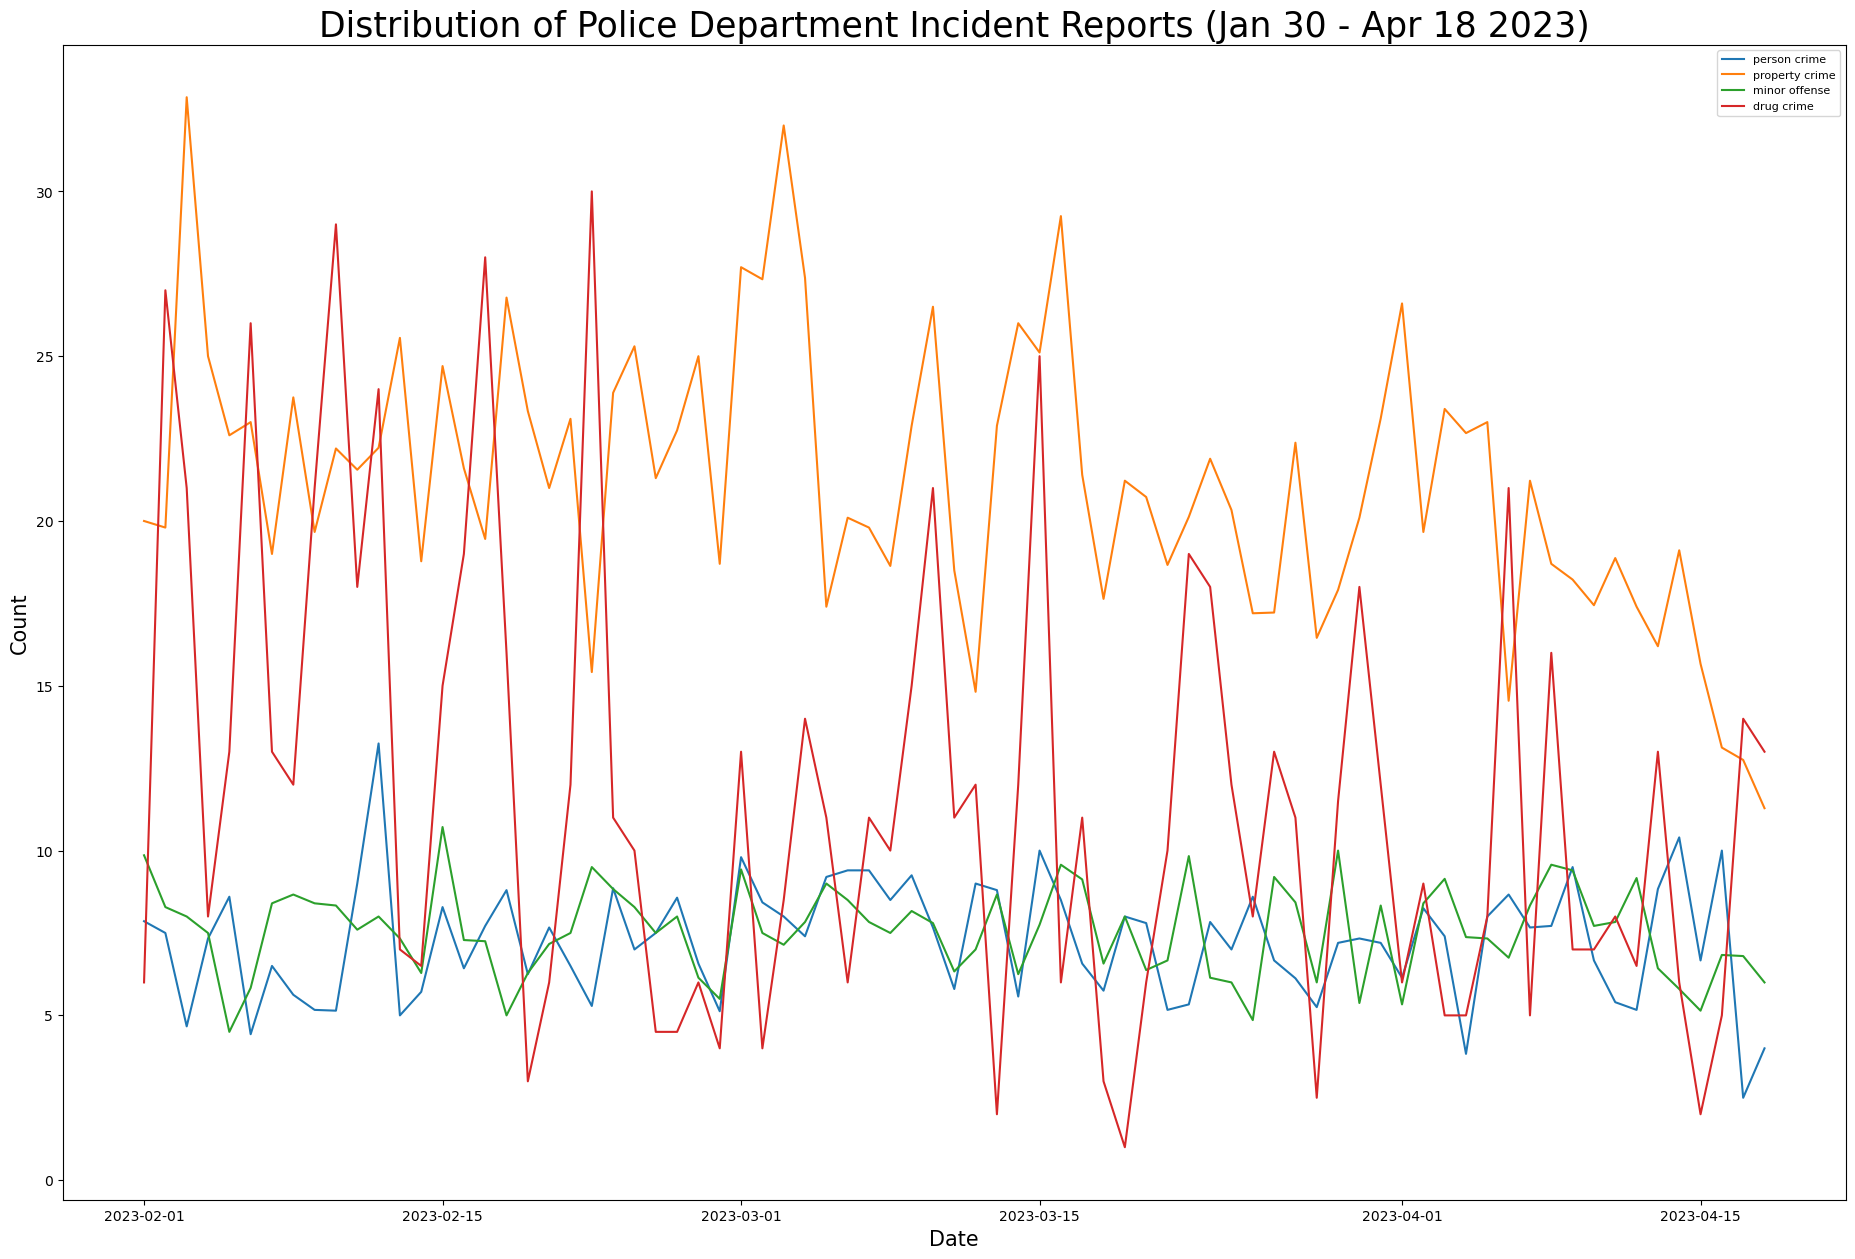

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plot = sns.lineplot(data=sfpd_crime_df, x="Incident Date", y="Incident Datetime", hue="crime type", ci=None)
fig.set_size_inches(23, 15)
plot.legend(fontsize = 8)
plt.xlabel('Date', fontsize = 15); # binned by day
plt.ylabel('Count', fontsize = 15);
plt.title('Distribution of Police Department Incident Reports (Jan 30 - Apr 18 2023)', fontsize = 25);
#plot.show()

# Lines of Best Fit

In [18]:
sfpd_crime_df = sfpd_crime_df.rename(columns = {'crime type' : 'crime_type'})

In [19]:
sfpd_crime_df = sfpd_crime_df.sort_values(by = 'Incident Date')

In [20]:
sfpd_crime_df['month'] = sfpd_crime_df['Incident Date'].apply(lambda x: x.month)

In [21]:
person_crime = sfpd_crime_df.loc[sfpd_crime_df['crime_type'] == 'person crime'].reset_index().sort_values(by = 'Incident Date')
drug_crime = sfpd_crime_df.loc[sfpd_crime_df['crime_type'] == 'drug crime'].reset_index().sort_values(by = 'Incident Date')
property_crime = sfpd_crime_df.loc[sfpd_crime_df['crime_type'] == 'property crime'].reset_index().sort_values(by = 'Incident Date')
minor_offense = sfpd_crime_df.loc[sfpd_crime_df['crime_type'] == 'minor offense'].reset_index().sort_values(by = 'Incident Date')

In [48]:
# function to convert dates into integer values
def date_conversion(crime_type):
    days = [0]
    for i in range(len(crime_type)):
        if i < len(crime_type)-1:
            day = (crime_type['Incident Date'][i+1] - crime_type['Incident Date'][i]).days
            if len(days) > 0 :
                day += days[i]
            days.append(day)
    return days

In [50]:
person_crime['days'] = date_conversion(person_crime)

In [51]:
from sklearn.linear_model import LinearRegression
# person crime
X = np.array(list(person_crime['days'].astype(int))).reshape(-1, 1)
y = list(person_crime['Incident Datetime']) # incident count
 
lr1 = LinearRegression()
lr1.fit(X, y)
print(lr1.intercept_, lr1.coef_, lr1.score(X, y))

7.092897976933353 [-1.624997e-05] 1.9218234781348542e-09


In [25]:
lr1.coef_ / np.mean(y)

array([-2.29121053e-06])

In [26]:
pd.Series(y).mad() / np.mean(y)

0.8742675979118495

In [52]:
property_crime['days'] =  date_conversion(property_crime)

In [53]:
from sklearn.linear_model import LinearRegression
property_crime
X = np.array(list(property_crime['days'].astype(int))).reshape(-1, 1)
y = list(property_crime['Incident Datetime']) # incident count
 
lr1 = LinearRegression()
lr1.fit(X, y)
print(lr1.intercept_, lr1.coef_, lr1.score(X, y))

23.97589760625795 [-0.07782037] 0.0037304115364514834


In [54]:
lr1.coef_ / np.mean(y)

array([-0.00369915])

In [55]:
pd.Series(y).mad() / np.mean(y)

0.8383144960865995

In [56]:
drug_crime['days'] = date_conversion(drug_crime)

In [57]:
from sklearn.linear_model import LinearRegression
# for organised_crime
X = np.array(list(drug_crime['days'].astype(int))).reshape(-1, 1)
y = list(drug_crime['Incident Datetime']) # incident count
 
lr1 = LinearRegression()
lr1.fit(X, y)
print(lr1.intercept_, lr1.coef_, lr1.score(X, y))

14.654718566837657 [-0.09673585] 0.07852259722241905


In [58]:
lr1.coef_ / np.mean(y)

array([-0.00877604])

In [59]:
pd.Series(y).mad() / np.mean(y)

0.5322399250234301

In [60]:
minor_offense['days'] = date_conversion(minor_offense)

In [61]:
from sklearn.linear_model import LinearRegression
# for minor_offense
X = np.array(list(minor_offense['days'].astype(int))).reshape(-1, 1)
y = list(minor_offense['Incident Datetime']) # incident count
 
lr1 = LinearRegression()
lr1.fit(X, y)
print(lr1.intercept_, lr1.coef_, lr1.score(X, y))

7.746851219370248 [-0.00603439] 0.0003091813026840917


In [62]:
lr1.coef_ / np.mean(y)

array([-0.00080263])

In [63]:
pd.Series(y).mad() / np.mean(y)

0.7494312899333373

In [65]:
crimes = ['person crime', 'property crime', 'drug crime', 'minor offense']
coefficients = [-2.29121053e-06, -0.00369915, -0.00877604, -0.00080263]
pd.DataFrame(index = crimes, data = coefficients).rename(columns = {0: 'Slope Values'})


,Slope Values
person crime,-0.000002
property crime,-0.003699
drug crime,-0.008776
minor offense,-0.000803


# Monthly Analysis (Slope)

In [66]:
from sklearn.linear_model import LinearRegression
# person crime
X = np.array(list(person_crime.loc[person_crime['month']<=2]['days'].astype(int))).reshape(-1, 1)
y = list(person_crime.loc[person_crime['month']<=2]['Incident Datetime']) # incident count
 
lr1 = LinearRegression()
lr1.fit(X, y)
print(lr1.intercept_, lr1.coef_, lr1.score(X, y))

6.503136120957999 [0.02253358] 0.0005327823599199366


In [67]:
lr1.coef_ / np.mean(y)

array([0.0033085])

In [68]:
pd.Series(y).mad() / np.mean(y)

0.8818103818103818

In [69]:
X = np.array(list(person_crime.loc[person_crime['month']==3]['days'].astype(int))).reshape(-1, 1)
y = list(person_crime.loc[person_crime['month']==3]['Incident Datetime']) # incident count
 
lr1 = LinearRegression()
lr1.fit(X, y)
print(lr1.intercept_, lr1.coef_, lr1.score(X, y))

11.113305521564023 [-0.08305174] 0.0071223309309143


In [70]:
lr1.coef_ / np.mean(y)

array([-0.01103973])

In [71]:
pd.Series(y).mad() / np.mean(y)

0.8903875029635677

In [72]:
X = np.array(list(person_crime.loc[person_crime['month']==4]['days'].astype(int))).reshape(-1, 1)
y = list(person_crime.loc[person_crime['month']==4]['Incident Datetime']) # incident count
 
lr1 = LinearRegression()
lr1.fit(X, y)
print(lr1.intercept_, lr1.coef_, lr1.score(X, y))

10.659185971685975 [-0.05637066] 0.001402551852381806


In [73]:
lr1.coef_ / np.mean(y)

array([-0.00822429])

In [74]:
pd.Series(y).mad() / np.mean(y)

0.8270010131712259

In [75]:
from sklearn.linear_model import LinearRegression
# person crime
X = np.array(list(property_crime.loc[property_crime['month']<=2]['days'].astype(int))).reshape(-1, 1)
y = list(property_crime.loc[property_crime['month']<=2]['Incident Datetime']) # incident count
 
lr1 = LinearRegression()
lr1.fit(X, y)
print(lr1.intercept_, lr1.coef_, lr1.score(X, y))

22.730581001380347 [-0.03839415] 0.00010704201681588366


In [76]:
lr1.coef_ / np.mean(y)

array([-0.00172882])

In [77]:
pd.Series(y).mad() / np.mean(y)

0.8438796975382341

In [78]:
X = np.array(list(property_crime.loc[property_crime['month']==3]['days'].astype(int))).reshape(-1, 1)
y = list(property_crime.loc[property_crime['month']==3]['Incident Datetime']) # incident count
 
lr1 = LinearRegression()
lr1.fit(X, y)
print(lr1.intercept_, lr1.coef_, lr1.score(X, y))

29.921479021904805 [-0.19801705] 0.0037071764712128807


In [79]:
lr1.coef_ / np.mean(y)

array([-0.00925167])

In [80]:
pd.Series(y).mad() / np.mean(y)

0.8595856396600505

In [81]:
X = np.array(list(property_crime.loc[property_crime['month']==4]['days'].astype(int))).reshape(-1, 1)
y = list(property_crime.loc[property_crime['month']==4]['Incident Datetime']) # incident count
 
lr1 = LinearRegression()
lr1.fit(X, y)
print(lr1.intercept_, lr1.coef_, lr1.score(X, y))

60.49806756369882 [-0.62510736] 0.02093628134970027


In [82]:
lr1.coef_ / np.mean(y)

array([-0.03380073])

In [83]:
pd.Series(y).mad() / np.mean(y)

0.7915289538652065

In [84]:
from sklearn.linear_model import LinearRegression
# person crime
X = np.array(list(drug_crime.loc[drug_crime['month']<=2]['days'].astype(int))).reshape(-1, 1)
y = list(drug_crime.loc[drug_crime['month']<=2]['Incident Datetime']) # incident count
 
lr1 = LinearRegression()
lr1.fit(X, y)
print(lr1.intercept_, lr1.coef_, lr1.score(X, y))

19.774302719103744 [-0.45571245] 0.15200795460140193


In [85]:
lr1.coef_ / np.mean(y)

array([-0.03441307])

In [86]:
pd.Series(y).mad() / np.mean(y)

0.590805075930934

In [87]:
X = np.array(list(drug_crime.loc[drug_crime['month']==3]['days'].astype(int))).reshape(-1, 1)
y = list(drug_crime.loc[drug_crime['month']==3]['Incident Datetime']) # incident count
 
lr1 = LinearRegression()
lr1.fit(X, y)
print(lr1.intercept_, lr1.coef_, lr1.score(X, y))

8.651929910981316 [0.03785933] 0.003277020223729332


In [88]:
lr1.coef_ / np.mean(y)

array([0.00368361])

In [89]:
pd.Series(y).mad() / np.mean(y)

0.4765765765765766

In [90]:
X = np.array(list(drug_crime.loc[drug_crime['month']==4]['days'].astype(int))).reshape(-1, 1)
y = list(drug_crime.loc[drug_crime['month']==4]['Incident Datetime']) # incident count
 
lr1 = LinearRegression()
lr1.fit(X, y)
print(lr1.intercept_, lr1.coef_, lr1.score(X, y))

4.434535308006012 [0.06127924] 0.003997994583423203


In [91]:
lr1.coef_ / np.mean(y)

array([0.00714298])

In [92]:
pd.Series(y).mad() / np.mean(y)

0.46561188246690344

In [93]:
from sklearn.linear_model import LinearRegression
# person crime
X = np.array(list(minor_offense.loc[minor_offense['month']<=2]['days'].astype(int))).reshape(-1, 1)
y = list(minor_offense.loc[minor_offense['month']<=2]['Incident Datetime']) # incident count
 
lr1 = LinearRegression()
lr1.fit(X, y)
print(lr1.intercept_, lr1.coef_, lr1.score(X, y))

7.853875640952235 [-0.02446697] 0.0006734864345259162


In [94]:
lr1.coef_ / np.mean(y)

array([-0.00325252])

In [95]:
pd.Series(y).mad() / np.mean(y)

0.7626687700866821

In [96]:
X = np.array(list(minor_offense.loc[minor_offense['month']==3]['days'].astype(int))).reshape(-1, 1)
y = list(minor_offense.loc[minor_offense['month']==3]['Incident Datetime']) # incident count
 
lr1 = LinearRegression()
lr1.fit(X, y)
print(lr1.intercept_, lr1.coef_, lr1.score(X, y))

9.148280949729505 [-0.03657572] 0.0017681876629863646


In [97]:
lr1.coef_ / np.mean(y)

array([-0.00482895])

In [98]:
pd.Series(y).mad() / np.mean(y)

0.7676438232058499

In [99]:
X = np.array(list(minor_offense.loc[minor_offense['month']==4]['days'].astype(int))).reshape(-1, 1)
y = list(minor_offense.loc[minor_offense['month']==4]['Incident Datetime']) # incident count
 
lr1 = LinearRegression()
lr1.fit(X, y)
print(lr1.intercept_, lr1.coef_, lr1.score(X, y))

13.300672487205924 [-0.08759465] 0.003974995937546355


In [100]:
lr1.coef_ / np.mean(y)

array([-0.01182])

In [101]:
pd.Series(y).mad() / np.mean(y)

0.6940619621342513